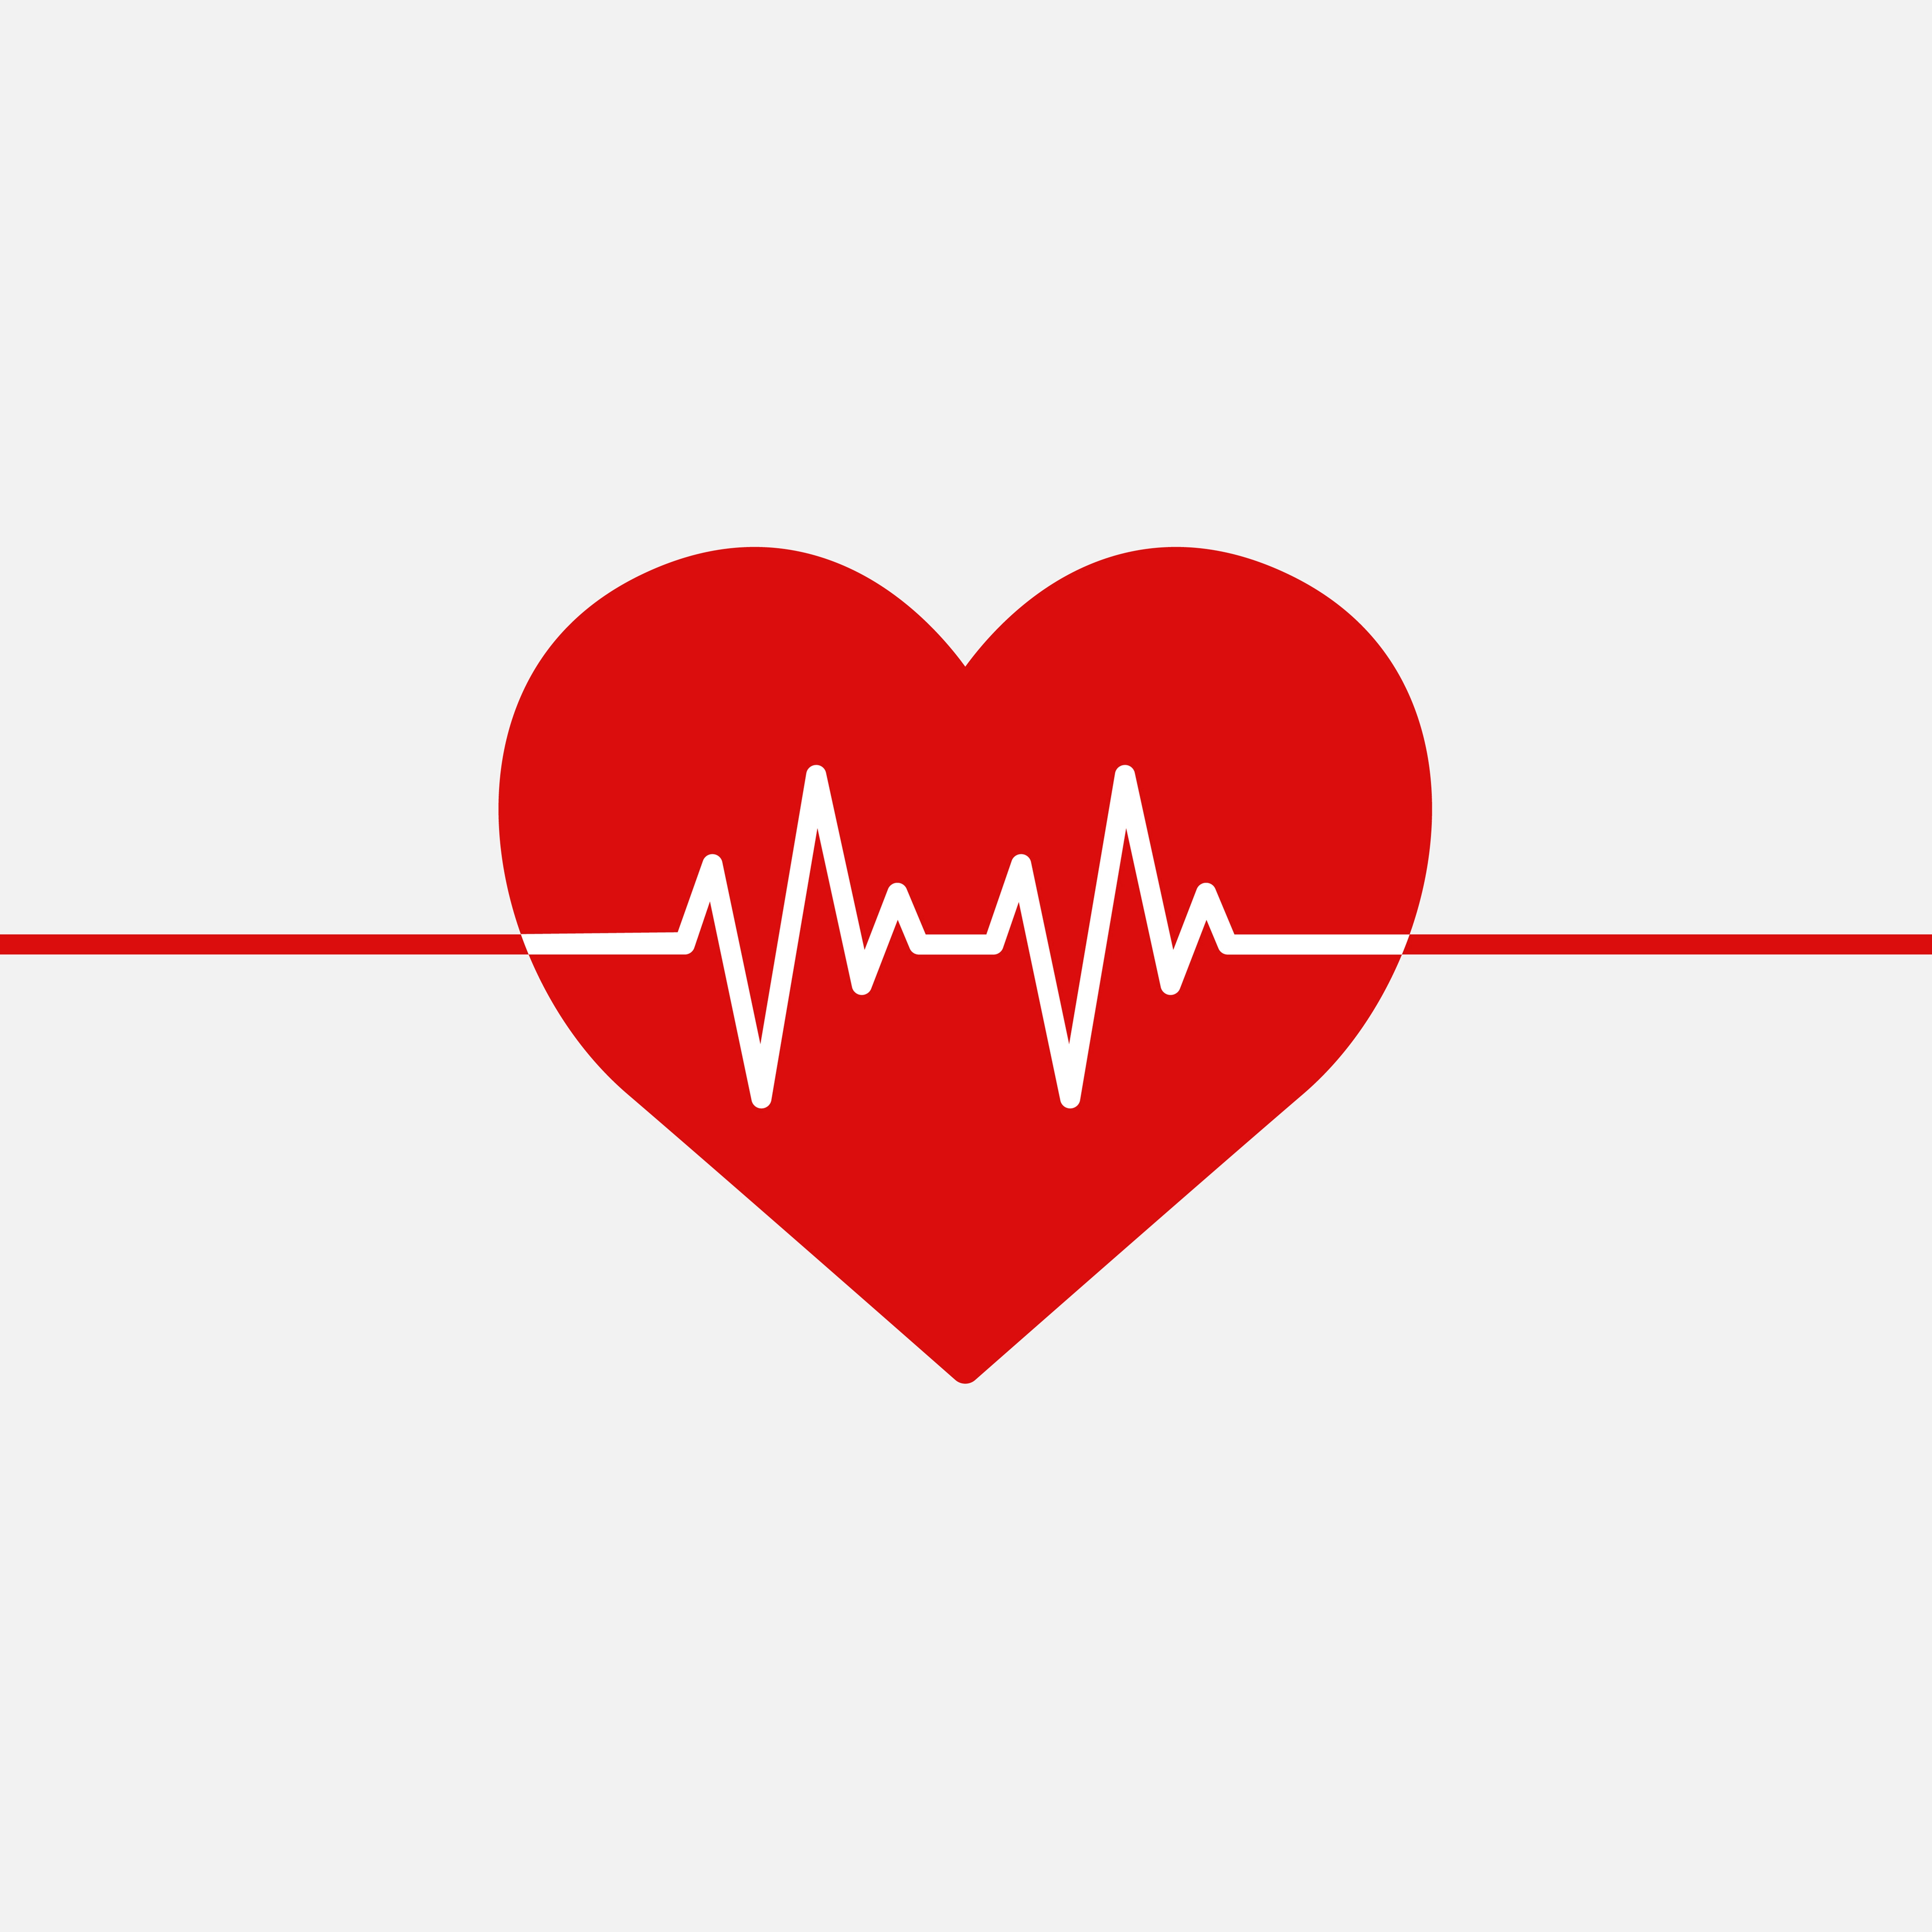
Heart attack is something very hard to predict.But with machine learning, predicting it becomes a piece of cake.In this notebook, I will explain how to make a model to predict heart attack.

Firstly, let's see the box plots so we know where the outliers are.

<AxesSubplot: >

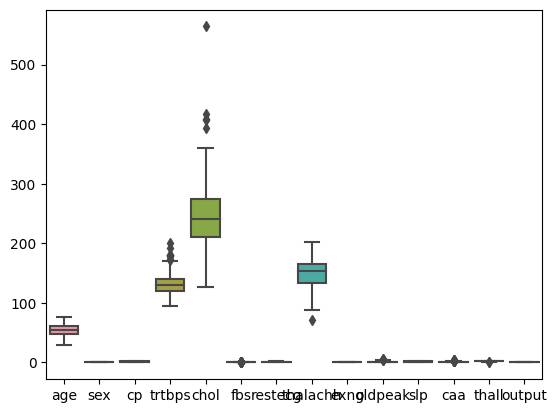

In [13]:
import pandas as pd
import seaborn as sns
data=pd.read_csv('heart.csv')
sns.boxplot(data,)

We can see that there are a lot of outliers. Let's do it the short way.

In [14]:
import numpy as np
data=pd.read_csv('heart.csv')
print(data.shape)
data=data[np.abs(data-data.mean())<2.3*data.std()]
data=data.dropna()

(303, 14)


Now let's remove the Nan values from the outliers and look at the dataset.

In [15]:
data.dropna()
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.0,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,53.586957,0.682609,0.947826,128.965217,242.873913,0.0,0.526087,150.769565,0.304348,0.926522,1.447826,0.573913,2.313043,0.569565
std,9.100545,0.466476,1.013821,15.552660,44.865317,0.0,0.500408,21.576186,0.461134,1.001720,0.579391,0.852029,0.566383,0.496217
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.500000,0.0,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.750000,0.0,1.000000,168.000000,1.000000,1.575000,2.000000,1.000000,3.000000,1.000000
max,74.000000,1.000000,3.000000,170.000000,360.000000,0.0,1.000000,192.000000,1.000000,3.600000,2.000000,3.000000,3.000000,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       230 non-null    float64
 1   sex       230 non-null    int64  
 2   cp        230 non-null    int64  
 3   trtbps    230 non-null    float64
 4   chol      230 non-null    float64
 5   fbs       230 non-null    float64
 6   restecg   230 non-null    float64
 7   thalachh  230 non-null    float64
 8   exng      230 non-null    int64  
 9   oldpeak   230 non-null    float64
 10  slp       230 non-null    int64  
 11  caa       230 non-null    float64
 12  thall     230 non-null    float64
 13  output    230 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 27.0 KB


Since the coloumns are all numeric, we can skip changing categorical values to numerical ones.

Now let's start building the model.

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('output',axis=1),data['output'])
from sklearn.ensemble import ExtraTreesClassifier
rf=ExtraTreesClassifier()
rf=rf.fit(X_train,y_train)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.92      0.97      0.95        36

    accuracy                           0.93        58
   macro avg       0.94      0.92      0.93        58
weighted avg       0.93      0.93      0.93        58



From here, we can see that our classifier has accuracy 0.93 which means it gets samples right 93% of the time which is very good.